In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns; sns.set()
from scipy.interpolate import griddata 

In [2]:
# Gradient 1
g1_CTD = pd.read_csv('Grad1CTD.csv')

# Gradient 2
g2_CTD = pd.read_csv('Grad2CTD.csv')

# Gradient 3 
g3_CTD = pd.read_csv('Grad1CTD.csv')
g3temp_data = pd.read_csv('Grad3Temp.csv') #surface thermosaline data

In [5]:
# dates with not exact matches 2016-04-21 and 2016-05-03
print('G1 FCM:', pd.unique(g1_fcm['date']))
print('G1 CTD:', pd.unique(g1_CTD['time']))

#dates with not exact matches 2017-05-31  
print('G2 FCM:', pd.unique(g2_fcm['date']))
print('G2 CTD:', pd.unique(g2_CTD['time']))

#dates with not exact matches 2019-04-25 , 28, 22, 20 (ALL OF THEM)
print('G3 FCM:', pd.unique(g3_fcm['date']))
print('G3 CTD:', pd.unique(g3_CTD['time']))

G1 FCM: ['2016-04-20T15:11:40' '2016-04-21T15:13:00' '2016-04-23T01:53:27'
 '2016-04-23T15:18:39' '2016-04-25T01:27:54' '2016-04-25T15:05:51'
 '2016-04-26T15:03:59' '2016-04-28T03:36:37' '2016-04-28T15:02:00'
 '2016-04-29T06:34:38' '2016-04-30T15:01:03' '2016-05-01T14:58:15'
 '2016-05-03T19:28:35']
G1 CTD: ['2016-04-20T15:11:40.000Z' '2016-04-21T01:17:53.000Z'
 '2016-04-21T05:03:23.000Z' '2016-04-22T15:01:42.000Z'
 '2016-04-23T01:53:27.000Z' '2016-04-23T03:46:47.000Z'
 '2016-04-23T15:18:39.000Z' '2016-04-24T15:03:42.000Z'
 '2016-04-25T01:27:54.000Z' '2016-04-25T03:33:49.000Z'
 '2016-04-25T15:05:51.000Z' '2016-04-26T15:03:59.000Z'
 '2016-04-27T15:04:55.000Z' '2016-04-28T03:36:37.000Z'
 '2016-04-28T05:10:07.000Z' '2016-04-28T15:06:15.000Z'
 '2016-04-29T06:34:38.000Z' '2016-04-30T15:01:03.000Z'
 '2016-05-01T14:58:15.000Z' '2016-05-02T15:01:27.000Z'
 '2016-05-02T19:28:35.000Z' '2016-05-03T00:12:38.000Z']
G2 FCM: ['2017-05-29T15:39:29' '2017-05-30T13:28:39' '2017-05-31T13:53:43'
 '2017-06-0

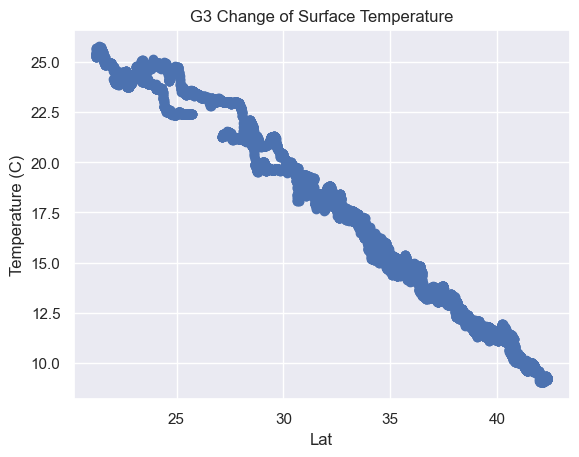

In [5]:
# creating scatter graph of temp levels
g3temp_sample = g3temp_data.sample(20000)

plt.title('G3 Change of Surface Temperature')
plt.xlabel('Lat')
plt.ylabel('Temperature (C)')

g3temp_lat = g3temp_sample['lat'].to_list()
g3sst = g3temp_sample['SST'].to_list()

plt.scatter(g3temp_lat, g3sst)

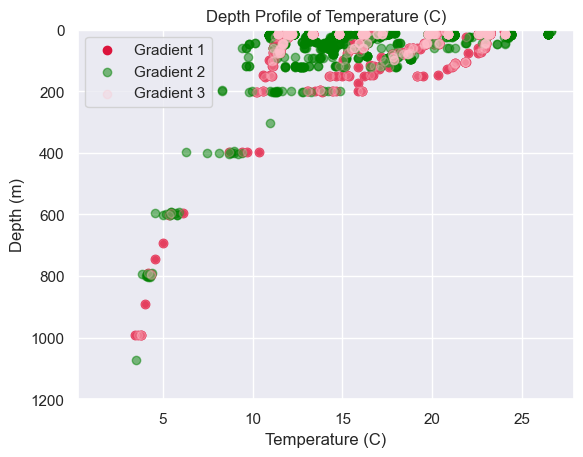

In [6]:
plt.title('Depth Profile of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.ylim(top = 1200)

g1_depth = g1_CTD['depth'].to_list()
g2_depth = g2_CTD['depth'].to_list()
g3_depth = g3_CTD['depth'].to_list()

g1_lat = g1_CTD['lat'].to_list()
g2_lat = g2_CTD['lat'].to_list()
g3_lat = g3_CTD['lat'].to_list()

g1_temp = g1_CTD['ctdtmp'].to_list()
g2_temp = g2_CTD['ctdtmp'].to_list()
g3_temp = g3_CTD['ctdtmp'].to_list()

plt.scatter(g1_temp, g1_depth, alpha = 1.0, color = 'crimson', label = 'Gradient 1')
plt.scatter(g2_temp, g2_depth, alpha = 0.5, color = 'green', label = 'Gradient 2')
plt.scatter(g3_temp, g3_depth, alpha = 0.25, color = 'pink', label = 'Gradient 3')
plt.legend()
plt.gca().invert_yaxis()

In [7]:
# rounding the CTD temperature lats in g1, g2, and g3
g1_r_lat = g1_CTD['lat'].round()
g1_CTD.insert(2, 'rlat', g1_r_lat)

g2_r_lat = g2_CTD['lat'].round()
g2_CTD.insert(2, 'rlat', g2_r_lat)

g3_r_lat = g3_CTD['lat'].round()
g3_CTD.insert(2, 'rlat', g3_r_lat)

In [8]:
# finding and sorting unique lats for each gradient
g1_temp_lats = g1_r_lat.unique()
g1_temp_lats = np.sort(g1_temp_lats)

g2_temp_lats = g2_r_lat.unique()
g2_temp_lats = np.sort(g2_temp_lats)

g3_temp_lats = g3_r_lat.unique()
g3_temp_lats = np.sort(g3_temp_lats)

# Combining the lats for the CTD temp data for G1, G2, and G3
all_temp_lats = np.concatenate((g1_temp_lats, g2_temp_lats, g3_temp_lats))
all_uni_temp_lats = np.unique(all_temp_lats)
all_uni_temp_lats = np.sort(all_uni_temp_lats)

# Create a color palette with enough colors for each unique latitude
temp_palette = sns.color_palette("viridis", n_colors = len(all_uni_temp_lats))

# Create a dictionary to map each latitude to a unique color
temp_lat_color_map = {lat: temp_palette[i] for i, lat in enumerate(all_uni_temp_lats)}

In [9]:
print(max(g1_CTD['depth']))
print(max(g2_CTD['depth']))
print(max(g3_CTD['depth']))

2957.87544212685
3003.85795018978
2957.87544212685


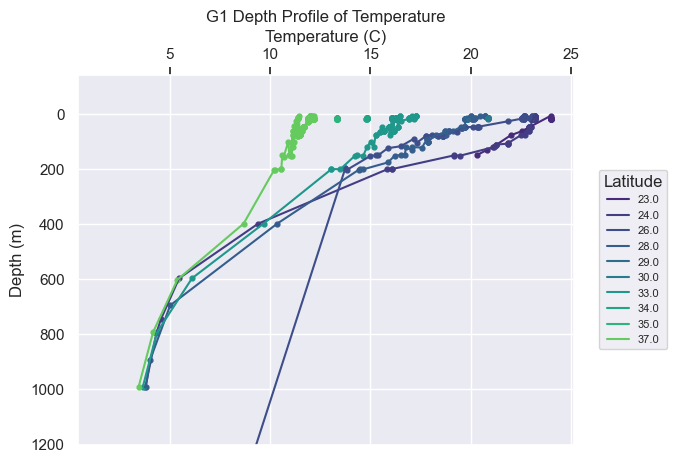

In [15]:
for lat in g1_temp_lats:
    ctd_df = g1_CTD.loc[g1_CTD['rlat'] == lat]
    depth = ctd_df['depth'].to_list()
    temp = ctd_df['ctdtmp'].tolist()
    sns.lineplot(data = ctd_df, x = temp, y = depth, color = temp_lat_color_map[lat], label = lat)
    plt.scatter(temp, depth, color = temp_lat_color_map[lat], s = 12)

plt.title('G1 Depth Profile of Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.ylim(top = 1200)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')

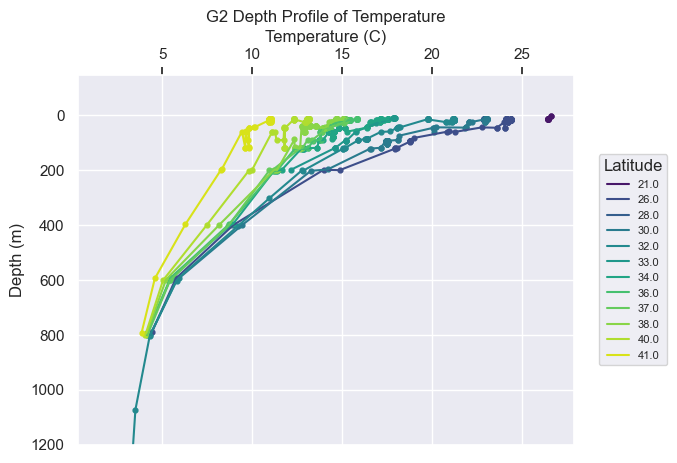

In [16]:
for lat in g2_temp_lats:
    ctd_df = g2_CTD.loc[g2_CTD['rlat'] == lat]
    depth = ctd_df['depth'].to_list()
    temp = ctd_df['ctdtmp'].tolist()
    sns.lineplot(data = ctd_df, x = temp, y = depth, color = temp_lat_color_map[lat], label = lat)
    plt.scatter(temp, depth, color = temp_lat_color_map[lat], s = 12)

plt.title('G2 Depth Profile of Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.ylim(top = 1200)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')

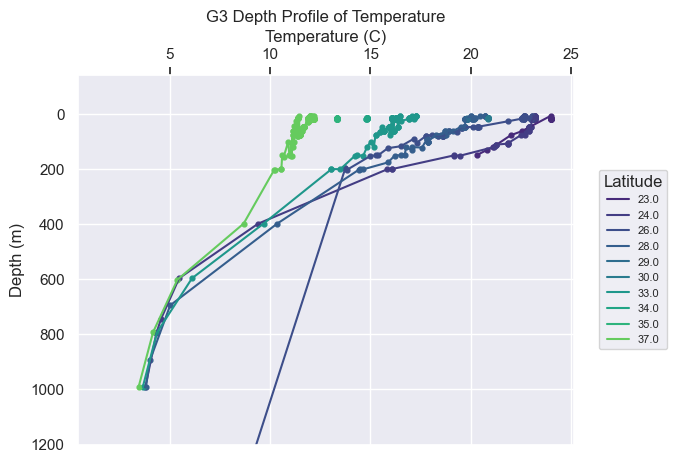

In [17]:
for lat in g3_temp_lats:
    ctd_df = g3_CTD.loc[g3_CTD['rlat'] == lat]
    depth = ctd_df['depth'].to_list()
    temp = ctd_df['ctdtmp'].tolist()
    sns.lineplot(data = ctd_df, x = temp, y = depth, color = temp_lat_color_map[lat], label = lat)
    plt.scatter(temp, depth, color = temp_lat_color_map[lat], s = 12)

plt.title('G3 Depth Profile of Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.ylim(top = 1200)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.legend(loc = 'right', bbox_to_anchor=(1.20, 0.5), prop={'size': 8}, title = 'Latitude')

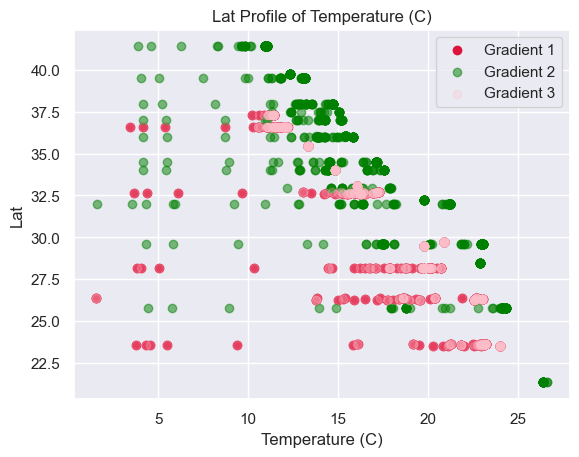

In [8]:
plt.title('Lat Profile of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Lat')

plt.scatter(g1_temp, g1_lat, alpha = 1.0, color = 'crimson', label = 'Gradient 1')
plt.scatter(g2_temp, g2_lat, alpha = 0.5, color = 'green', label = 'Gradient 2')
plt.scatter(g3_temp, g3_lat, alpha = 0.25, color = 'pink', label = 'Gradient 3')
plt.legend()

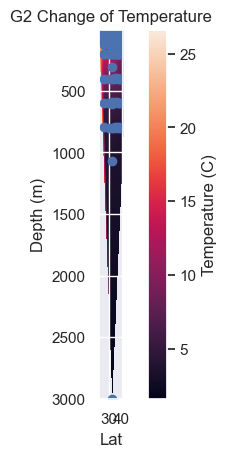

In [9]:
plt.title('G2 Change of Temperature')
plt.xlabel('Lat')
plt.ylabel('Depth (m)')

g2temp_lat = g2_CTD['lat'].to_list()
g2temp_depth = g2_CTD['depth'].to_list()
g2temps = g2_CTD['ctdtmp'].to_list()

# number of samples to generate
numcols, numrows = 1000, 1000

# specify grid limits to color in data
# Creates array of x and y values
xtemp2 = np.linspace(min(g2temp_lat), max(g2temp_lat), numcols)
ytemp2 = np.linspace(min(g2temp_depth), max(g2temp_depth), numrows)

# Create 2-D rectangular grid from 1-D inputs (arrays)
xtemp2, ytemp2 = np.meshgrid(xtemp2, ytemp2)

# grid of interpolated data
ztemp2 = griddata((g2temp_lat, g2temp_depth), g2temps, (xtemp2, ytemp2), method = 'linear')

temp2 = plt.imshow(ztemp2, extent=[min(g2temp_lat), max(g2temp_lat), min(g2temp_depth), max(g2temp_depth)], aspect=0.10, interpolation = 'nearest', origin = 'lower')

# create color bar
plt.colorbar(temp2, label = 'Temperature (C)')

plt.scatter(g2temp_lat, g2temp_depth)
plt.gca().invert_yaxis()